<a href="https://colab.research.google.com/github/Emadalnajaar/Detection-_Breast_Cancer/blob/master/cancer_data3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn



#Load Data

In [0]:
dataset = pd.read_csv('/content/cancer_data3.csv')

#Dataset

In [6]:
dataset.head()

,ID,Diagnosis,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,Unnamed: 31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
dataset.tail()

,ID,Diagnosis,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,Unnamed: 31
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [8]:
dataset.shape

(569, 32)

In [9]:
dataset.describe()

,ID,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,Unnamed: 31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           569 non-null    int64  
 1   Diagnosis    569 non-null    object 
 2   3            569 non-null    float64
 3   4            569 non-null    float64
 4   5            569 non-null    float64
 5   6            569 non-null    float64
 6   7            569 non-null    float64
 7   8            569 non-null    float64
 8   9            569 non-null    float64
 9   10           569 non-null    float64
 10  11           569 non-null    float64
 11  12           569 non-null    float64
 12  13           569 non-null    float64
 13  14           569 non-null    float64
 14  15           569 non-null    float64
 15  16           569 non-null    float64
 16  17           569 non-null    float64
 17  18           569 non-null    float64
 18  19           569 non-null    float64
 19  20      

In [12]:
col = dataset.columns.values
col

array(['ID', 'Diagnosis', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31',
       'Unnamed: 31'], dtype=object)

#Label Encoder

In [0]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Diagnosis'] = LE.fit_transform(dataset['Diagnosis'])

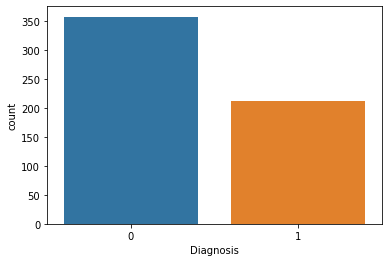

In [17]:
sns.countplot(dataset['Diagnosis'])

**Detect core data by switch number col in i**

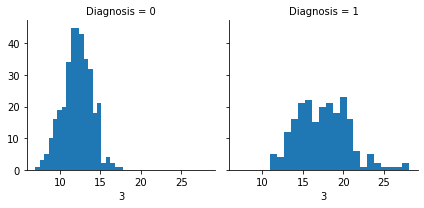

In [15]:
i=str(3)
ta = sns.FacetGrid(dataset, col='Diagnosis')
ta.map(plt.hist ,i ,  bins=20)

In [18]:
"""
i=str(3)
dataset[['Diagnosis',i]].groupby(['Diagnosis'], as_index = False).mean().sort_values(by = i ,ascending=False)
"""

,Diagnosis,3
1,1,17.462830
0,0,12.146524


**This line so importent becouse rate Density**

---
Now I can show correlation between all columns and that is by passing the name of column

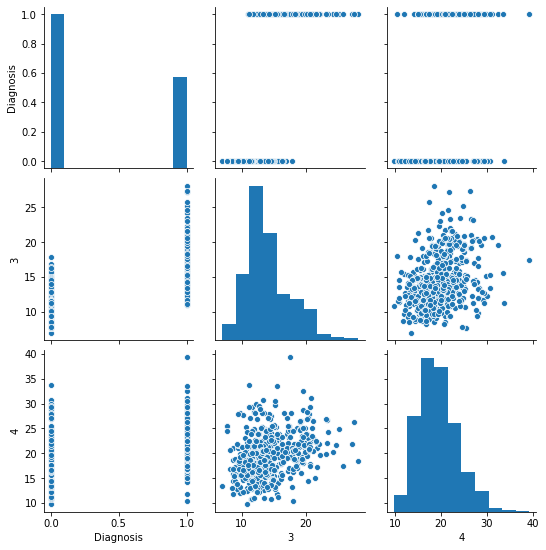

In [19]:
sns.pairplot(dataset[['Diagnosis', '3', '4']])

show correlation by image 

Text(0.5, 1.05, 'Correlations Feature')

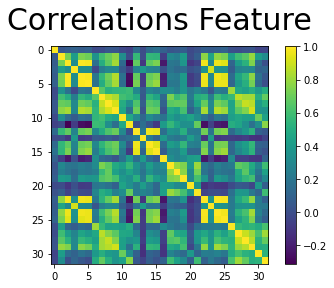

In [20]:
title_config = {'fontsize': 30, 'y': 1.05}
plt.imshow(dataset.corr())
plt.colorbar()
plt.title("Correlations Feature" , **title_config)

Drop Data

In [0]:
X = dataset.drop(['ID','Diagnosis'] , axis = 1)
y = dataset['Diagnosis']

Split Data

In [0]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split( X, y, test_size = 0.2, random_state=55)

Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler, Normalizer , MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#1 MinMaxScaling 
#2 StandardScaler
#3 Normalizer

#MODEL

In [23]:
%%time
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB , CategoricalNB , BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2),
    SVC(kernel="linear", C=0.01, probability=True),
    SVC(kernel = 'rbf',gamma = 0.001, C=200, probability=True, random_state = 0),
    NuSVC(probability=True),
    DecisionTreeClassifier(criterion = 'entropy'),
    RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    DecisionTreeClassifier(criterion = 'gini')]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.2%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {:.2%}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
print("_"*30)
results = log.sort_values(by='Accuracy' , ascending = False)
print(results)

LogisticRegression
****Results****
Accuracy: 98.25%
Log Loss: 11.62%
KNeighborsClassifier
****Results****
Accuracy: 98.25%
Log Loss: 5.13%
SVC
****Results****
Accuracy: 86.84%
Log Loss: 14.29%
SVC
****Results****
Accuracy: 97.37%
Log Loss: 7.67%
NuSVC
****Results****
Accuracy: 96.49%
Log Loss: 10.28%
DecisionTreeClassifier
****Results****
Accuracy: 92.11%
Log Loss: 272.67%
RandomForestClassifier
****Results****
Accuracy: 97.37%
Log Loss: 37.52%
AdaBoostClassifier
****Results****
Accuracy: 95.61%
Log Loss: 33.40%
GradientBoostingClassifier
****Results****
Accuracy: 96.49%
Log Loss: 15.06%
GaussianNB
****Results****
Accuracy: 93.86%
Log Loss: 69.66%
LinearDiscriminantAnalysis
****Results****
Accuracy: 96.49%
Log Loss: 12.94%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 95.61%
Log Loss: 59.17%
DecisionTreeClassifier
****Results****
Accuracy: 91.23%
Log Loss: 302.97%
______________________________
                      Classifier   Accuracy  Log Loss
0             LogisticRegres

#PLOT

**Working plot for my results**

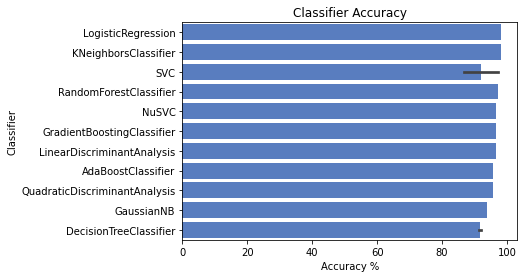

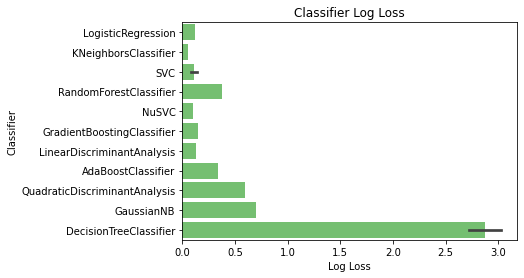

In [25]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=results, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=results, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()